In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("ALgerian forest Cleaned data set.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
df["Classes"] = np.where(df["Classes"].str.contains("not fire"),0,1)

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [5]:
df.drop(["day","month","year"],axis=1,inplace = True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [7]:
X = df.drop("FWI",axis=1)
y = df["FWI"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [10]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((182, 11), (61, 11), (182,), (61,))

In [11]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


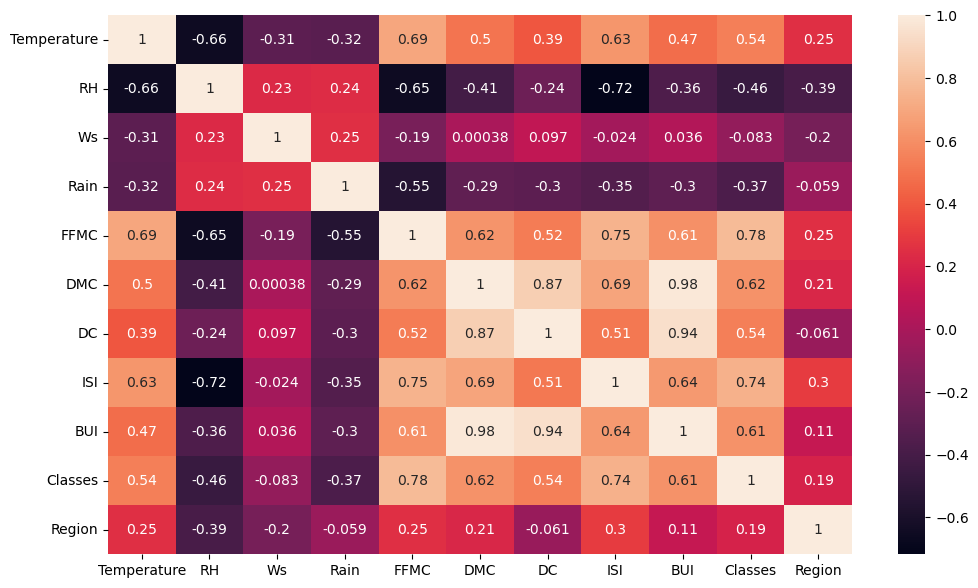

In [12]:
plt.figure(figsize=(12,7))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [13]:
def correlation(Dataset,threshold) :
    col_corr = set()
    matrix_corr = Dataset.corr()
    for i in range(len(matrix_corr.columns)) :
        for j in range(i) :
            if abs(matrix_corr.iloc[i,j]) > threshold :
                colname = matrix_corr.columns[i]
                col_corr.add(colname)
    return col_corr

In [14]:
corr_features = correlation(X_train,0.85)

In [15]:
corr_features

{'BUI', 'DC'}

In [15]:
X_train.drop(corr_features,axis=1,inplace= True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [16]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.629848,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.717804,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,-0.023558,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.345707,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.750799,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.685656,0.617273,0.212582
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,1.000000,0.742977,0.296441
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.742977,1.000000,0.188837
Region,0.254549,-0.394665,-0.199969,-0.059022,0.249514,0.212582,0.296441,0.188837,1.000000


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

/tmp/ipykernel_77/2075840262.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train_scaled after scaling')

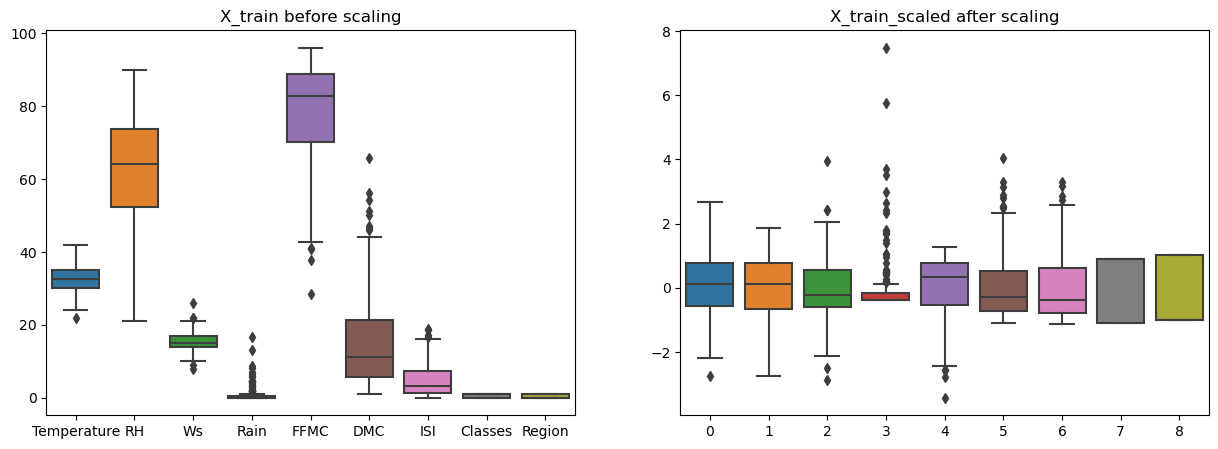

In [19]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train_scaled after scaling")

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet,Ridge,Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Mean absolute error 0.5468236465249985
R2 Score 0.9847657384266951


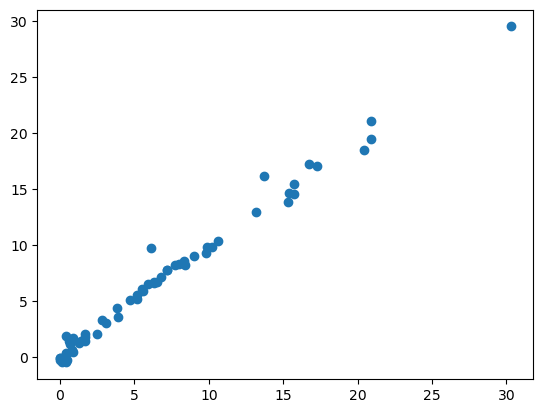

In [21]:
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean Absolute Error 1.133175994914409
R2_score =  0.9492020263112388


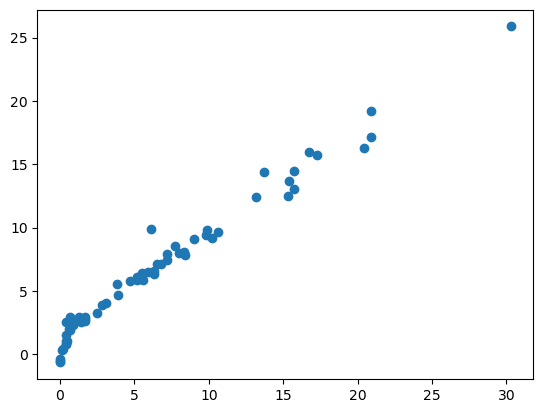

In [22]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error",mae)
print("R2_score = ",score)
plt.scatter(y_test,y_pred)

Mean Absolute Error 0.6199701158263433
R2_score 0.9820946715928275


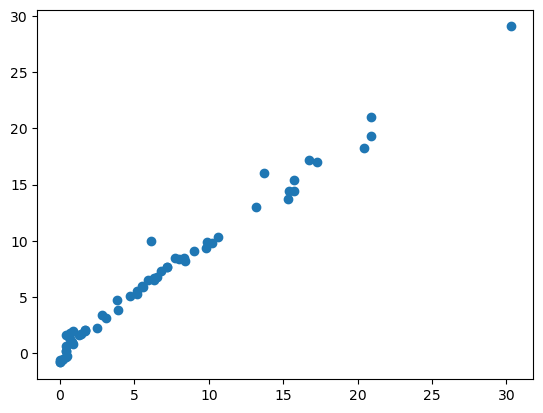

In [23]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
plt.scatter(y_test,y_pred)
print("Mean Absolute Error",mae)
print("R2_score",score)

Mean Absolute Error 0.5642305340105692
R2_score 0.9842993364555513


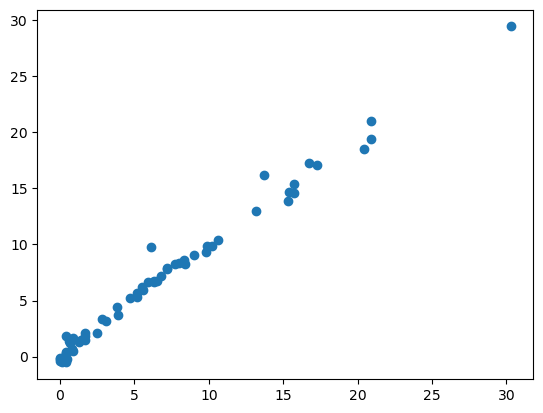

In [24]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
plt.scatter(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error",mae)
print("R2_score",score)

Mean Absolute Error 0.5642305340105692
R2_score 0.9842993364555513


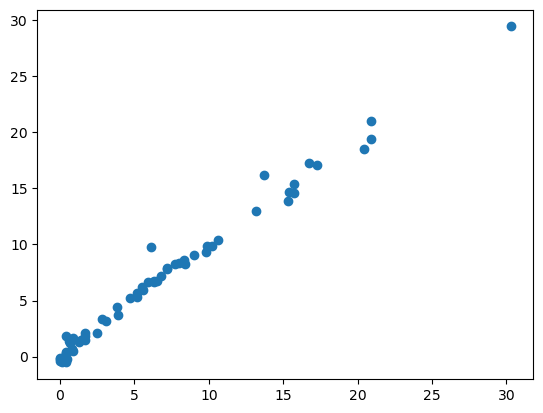

In [25]:
## CV = Cross Validation divide data into two parts 1st as train data and 2nd as CV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred = ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score= r2_score(y_test,y_pred)
print("Mean Absolute Error",mae)
print("R2_score",score)

In [26]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

Mean Absolute Error 1.8822353634896005
R2_score 0.8753460589519703


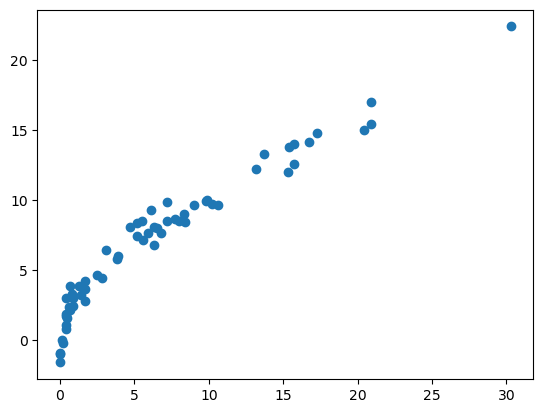

In [27]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()
elasticnet.fit(X_train_scaled,y_train)
y_pred = elasticnet.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error",mae)
print("R2_score",score)

Mean Absolute Error 0.6575946731430898
R2_score 0.9814217587854941


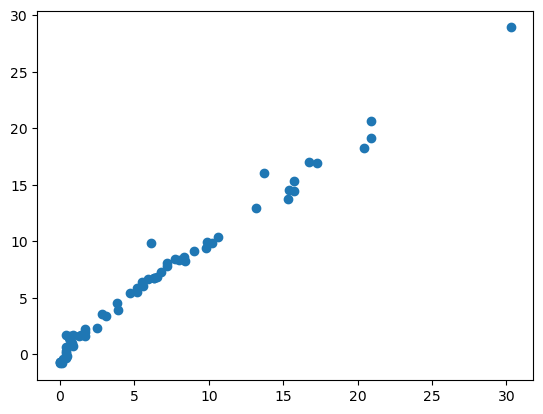

In [28]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv = ElasticNetCV(cv=5)
elasticnetcv.fit(X_train_scaled,y_train)
y_pred = elasticnetcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error",mae)
print("R2_score",score)

In [29]:
elasticnetcv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

In [30]:
import pickle

In [32]:
scaler

StandardScaler()

In [33]:
ridge

Ridge()

In [34]:
pickle.dump(scaler,open("scaler.pkl","wb"))
pickle.dump(ridge,open("pickle.pkl","wb"))